In [1]:
import numpy as np
import scipy.stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
import datetime as dt
dt.datetime.strptime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import LSTM
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import seaborn as sns
from sklearn.metrics import r2_score
plt.style.use("bmh")

/home/rohit/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rohit/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rohit/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rohit/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [2]:
data = pd.read_csv("Talca_Region.ods", sep = "|")

In [3]:
data.columns = data.columns.str.strip()

In [119]:
data.iloc[69+122:,:]

,#EventID,Time,Latitude,Longitude,Depth/km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
191,1853079,2004-04-18 17:35:41+00:00,-35.8870,-71.5340,125.1,GUC,ISC,ISC,7331964,ML,3.4,GUC,CENTRAL CHILE
192,1849346,2004-05-17 18:54:08+00:00,-35.6029,-71.6751,100.9,ISC,ISC,ISC,7344493,ML,3.8,GUC,CENTRAL CHILE
193,1865200,2004-05-20 09:38:09+00:00,-35.1750,-71.2140,96.9,GUC,ISC,ISC,7345673,ML,4.0,GUC,CENTRAL CHILE
194,1918683,2004-05-29 09:15:41+00:00,-35.9800,-71.3400,117.4,GUC,ISC,ISC,7349692,ML,3.2,GUC,CENTRAL CHILE
195,1767902,2004-06-03 07:53:13+00:00,-35.5890,-71.3760,88.4,GUC,ISC,ISC,7352544,ML,3.4,GUC,CENTRAL CHILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,10792843,2015-06-22 12:24:29+00:00,-35.7870,-71.4630,112.5,GUC,ISC,ISC,609378586,ML,3.7,GUC,CENTRAL CHILE
669,10815596,2015-07-08 02:55:55+00:00,-35.6540,-71.2390,104.8,GUC,ISC,ISC,609378748,ML,3.7,GUC,CENTRAL CHILE
670,5151013,2015-07-15 16:29:57+00:00,-35.3442,-71.7173,63.1,ISC,ISC,ISC,607466885,ML,3.8,GUC,CENTRAL CHILE
671,10835504,2015-07-28 19:06:57+00:00,-35.0340,-71.8310,38.5,GUC,ISC,ISC,609378938,ML,3.0,GUC,CENTRAL CHILE


In [ ]:
max(data.iloc[:,10])

In [5]:
bLst = []
for index, row in data.iterrows():
    if(index >= 49):
        sumM = 0
        for j in range(index,index-50,-1):
            sumM+=data.iloc[j,10]
        Mbar = sumM/50
        bLst.append( (0.4342944819)/(Mbar - 3) )

## b[0] corresponds to data[49]

In [ ]:
bLst[:10]

In [ ]:
len(bLst)

In [ ]:
bLst[1]

## x1_i[0] corresponds to data[53]

In [6]:
x1_i = []
for i,b in enumerate(bLst):
    if(i >= 4 ):
        x1_i.append( bLst[i] - bLst[i-4] )

In [ ]:
len(x1_i)

## x2_i[0] corresponds to data[57]

In [7]:
x2_i = []
for i,b in enumerate(bLst):
    if(i >= 8):
        x2_i.append(  bLst[i-4] - bLst[i-8] )

In [ ]:
len(x2_i)

## x3_i[0] corresponds to data[61]

In [8]:
x3_i = []
for i,b in enumerate(bLst):
    if(i >= 12):
        x3_i.append(  bLst[i-8] - bLst[i-12] )

In [ ]:
len(x3_i)

## x4_i[0] corresponds to data[65]

In [9]:
x4_i = []
for i,b in enumerate(bLst):
    if(i >= 16):
        x4_i.append(  bLst[i-12] - bLst[i-16] )

In [ ]:
len(x4_i)

## x5_i[0] corresponds to data[69]

In [10]:
x5_i = []
for i,b in enumerate(bLst):
    if(i >= 20):
        x5_i.append(  bLst[i-16] - bLst[i-20] )

In [ ]:
len(x5_i)

In [11]:
from datetime import timedelta

In [12]:
dates = pd.Series(pd.date_range(start='20010103', end='20150829'))

In [13]:
df = dates.groupby(np.arange(len(dates))//1).agg(['first', 'last'])

In [14]:
df['first'] = df['first'].dt.tz_localize('utc')
df['last'] = df['last'].dt.tz_localize('utc') + timedelta(1) - timedelta(seconds=1)

In [ ]:
len(df)

In [15]:
data.Time = pd.to_datetime(data.Time).dt.tz_localize('utc')

In [16]:
dayWind = []
for i in range(5352):
    dayWind.append(data[ (data['Time'] > df['first'][i]) & (data['Time'] < df['last'][i]) ])

## Dictionary for quake to dayIndex

In [17]:
quakeToDay = {}
cnt = 1
for i,d in enumerate(dayWind):
    if( len(d) > 0 ):
        for j in range(len(d)):
            quakeToDay[cnt] = i
            cnt+=1

In [ ]:
quakeToDay

In [18]:
x6_i = []
for day, row in enumerate(dayWind):
    tmpMagLst = []
    if(day >= 7):
        for ind in range(day-1, day-8, -1):
            if( len(dayWind[ind]) > 0 ):
                for i in range(len(dayWind[ind])):
                    tmpMagLst.append(dayWind[ind].iloc[i,10])
        if( len(tmpMagLst) > 0 ):
            magMx = max(tmpMagLst)
            x6_i.append(magMx)
        else:
            x6_i.append(0)
    else:
        if(day == 0):
            x6_i.append(0)
        else:
            x6_i.append(3.3)

In [ ]:
len(x6_i)

In [19]:
x6_act = []
for i,r in data.iterrows():
    if(i>=69):
        x6_act.append(x6_i[quakeToDay[i+1]])

In [ ]:
x6_act[:10]

In [ ]:
len(x6_act)

In [20]:
x7_i = []
for i,b in enumerate(bLst):
    if( i >= 20):
        x7_i.append(10**( (-3) * b))

In [ ]:
len(x7_i)

In [21]:
y_i = []
for day, row in enumerate(dayWind):
    tmpMagLst = []
    if(day <= 5346):
        for ind in range(day+1, day+6, 1):
            if( len(dayWind[ind]) > 0 ):
                for i in range(len(dayWind[ind])):
                    tmpMagLst.append(dayWind[ind].iloc[i,10])
        if( len(tmpMagLst) > 0 ):
            magMx = max(tmpMagLst)
            y_i.append(magMx)
        else:
            y_i.append(0)
    else:
        for ind in range(day+1, 5352, 1):
            if( len(dayWind[ind]) > 0 ):
                for i in range(len(dayWind[ind])):
                    tmpMagLst.append(dayWind[ind].iloc[i,10])
        if( len(tmpMagLst) > 0 ):
            magMx = max(tmpMagLst)
            y_i.append(magMx)
        else:
            y_i.append(0)

In [ ]:
len(y_i)

In [22]:
y_act = []
for i,r in data.iterrows():
    if(i>=69):
        y_act.append(y_i[quakeToDay[i+1]])

In [ ]:
len(y_act)

## Remove last quake as yi can't be calculated for it

In [23]:
y_act = y_act[:-1]

In [ ]:
len(y_act)

## Remove Row Corrs to Last event from every indp variable

In [24]:
x7_act = x7_i[:-1]
x6_act = x6_act[:-1]
x5_act = x5_i[:-1]
x4_act = x4_i[4:-1]
x3_act = x3_i[8:-1]
x2_act = x2_i[12:-1]
x1_act = x1_i[16:-1]

In [25]:
print("yi: {}".format(len(y_act)))
print("x7: {}".format(len(x7_act)))
print("x6: {}".format(len(x6_act)))
print("x5: {}".format(len(x5_act)))
print("x4: {}".format(len(x4_act)))
print("x3: {}".format(len(x3_act)))
print("x2: {}".format(len(x2_act)))
print("x1: {}".format(len(x1_act)))

yi: 603
x7: 603
x6: 603
x5: 603
x4: 603
x3: 603
x2: 603
x1: 603


In [ ]:
print("First 5 x1 values: ")
print(x1_act[:5])
print("First 5 x2 values: ")
print(x2_act[:5])
print("First 5 x3 values: ")
print(x3_act[:5])
print("First 5 x4 values: ")
print(x4_act[:5])
print("First 5 x5 values: ")
print(x5_act[:5])
print("First 5 x6 values: ")
print(x6_act[:5])
print("First 5 x7 values: ")
print(x7_act[:5])

In [ ]:
print("first 5 yi values: ")
print(y_act[:5])

## Try Using only 122 Values

In [ ]:
posData = data.iloc[69:,10] > threshold
posIndex = posData[posData].index
posIndex = posIndex[25:25+20]

In [ ]:
posIndex

In [ ]:
x1_less = x1_act[:102]
x2_less = x2_act[:102]
x3_less = x3_act[:102]
x4_less = x4_act[:102]
x5_less = x5_act[:102]
x6_less = x6_act[:102]
x7_less = x7_act[:102]
for i in posIndex:
    x1_less.append(x1_act[i])
    x2_less.append(x2_act[i])
    x3_less.append(x3_act[i])
    x4_less.append(x4_act[i])
    x5_less.append(x5_act[i])
    x6_less.append(x6_act[i])
    x7_less.append(x7_act[i])

In [26]:
x1_less = x1_act[:122]
x2_less = x2_act[:122]
x3_less = x3_act[:122]
x4_less = x4_act[:122]
x5_less = x5_act[:122]
x6_less = x6_act[:122]
x7_less = x7_act[:122]

In [27]:
x1_less_test = x1_act[122:]
x2_less_test = x2_act[122:]
x3_less_test = x3_act[122:]
x4_less_test = x4_act[122:]
x5_less_test = x5_act[122:]
#x6_less_test = x6_act[122:122+50]
x6_less_test = x6_act[122:]
x7_less_test = x7_act[122:]

In [ ]:
y_less = y_act[:102]
for i in posIndex:
    y_less.append(y_act[i])

In [28]:
y_less_test = y_act[122:]

In [29]:
y_less = y_act[:122]

In [30]:
y_less = pd.Series(y_less)

In [ ]:
len(y_less_test)

In [31]:
y_less_test = pd.Series(y_less_test)

In [ ]:
magList = []
#data.iloc[:,10].tolist()
magList = data.iloc[:102,10].tolist()
for i in posIndex:
    magList.append(data.iloc[i,10])

In [ ]:
magList = pd.Series(magList)

In [32]:
#std_dev = data.iloc[69+100:69+100+122,10].std()
#std_dev = data.iloc[69:69+603-50,10].std()
#std_dev = magList.std()
std_dev = data.iloc[69:69+122,10].std()

In [33]:
#threshold = data.iloc[69+100:69+100+122,10].mean() + (0.6 * std_dev)
#threshold = data.iloc[69:69+603-50,10].mean() + (0.6 * std_dev)
#threshold = magList.mean() + (0.6 * std_dev)
threshold = data.iloc[69:69+122,10].mean() + (0.6 * std_dev)

In [ ]:
threshold

In [34]:
data_df_test = pd.DataFrame({'x1': x1_less_test, 'x2': x2_less_test, 'x3': x3_less_test, 'x4': x4_less_test, 'x5': x5_less_test, 'x6': x6_less_test, 'x7': x7_less_test})

In [35]:
data_df = pd.DataFrame({'x1': x1_less, 'x2': x2_less, 'x3': x3_less, 'x4': x4_less, 'x5': x5_less, 'x6': x6_less, 'x7': x7_less})

In [ ]:
data_df

In [36]:
stats2 = y_less.describe()
stats2 = stats2.transpose()
stats2

count    122.000000
mean       1.888525
std        1.792417
min        0.000000
25%        0.000000
50%        3.050000
75%        3.600000
max        4.300000
dtype: float64

In [37]:
stats = data_df.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
x1,122.0,0.010665,0.042138,-0.117101,-0.018722,0.011638,0.035223,0.117238
x2,122.0,0.007792,0.041295,-0.117101,-0.020421,0.009224,0.034459,0.117238
x3,122.0,0.006885,0.041059,-0.117101,-0.023275,0.007674,0.033791,0.117238
x4,122.0,0.006681,0.041117,-0.117101,-0.024292,0.007357,0.033791,0.117238
x5,122.0,0.006563,0.041223,-0.117101,-0.024292,0.007357,0.033791,0.117238
x6,122.0,2.246721,1.818372,0.000000,0.000000,3.200000,3.700000,5.000000
x7,122.0,0.002016,0.001631,0.000147,0.000498,0.001857,0.003263,0.005875


In [38]:
def norm(x):
    return (x - stats['min']) /( stats['max'] - stats['min'] )

In [39]:
def normLabel(x):
    return (x - stats2['min']) /( stats2['max'] - stats2['min'] )

In [40]:
normed_train = norm(data_df)

In [41]:
normed_test = norm(data_df_test)

In [42]:
norm_y = normLabel(y_less)

In [43]:
norm_y_test = normLabel(y_less_test)

In [ ]:
y_less

In [ ]:
normed_train

In [ ]:
norm_y

In [81]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=[len(data_df.keys())]),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(loss='mean_squared_error',
                  #metrics = ['accuracy'],
                optimizer=optimizer)
    return model

In [82]:
model = build_model()

In [83]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                120       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 16        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [84]:
EPOCHS = 3500

history = model.fit(
  normed_train, norm_y,
  epochs=EPOCHS,validation_split = 0.15, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.1817,  val_loss:0.1630,  
....................................................................................................
Epoch: 100, loss:0.1536,  val_loss:0.1783,  
....................................................................................................
Epoch: 200, loss:0.1511,  val_loss:0.1747,  
....................................................................................................
Epoch: 300, loss:0.1495,  val_loss:0.1727,  
....................................................................................................
Epoch: 400, loss:0.1518,  val_loss:0.1962,  
....................................................................................................
Epoch: 500, loss:0.1448,  val_loss:0.1697,  
....................................................................................................
Epoch: 600, loss:0.1401,  val_loss:0.1573,  
................................................................................

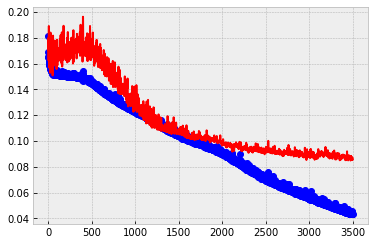

In [89]:
# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.savefig('loss.png')

In [88]:
plt.savefig('lossCurve.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
EPOCHS = 1200
model = build_model()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=90)
early_history = model.fit(normed_train, norm_y, 
                    epochs=EPOCHS, validation_split = 0.10, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

In [ ]:
# Plots 'history'
history_dict=early_history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [86]:
y_train_pred = model.predict(normed_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(norm_y, y_train_pred)))

The R2 score on the Train set is:	0.711


In [87]:
y_test_pred = model.predict(normed_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(norm_y_test, y_test_pred)))

The R2 score on the Train set is:	-0.412


In [ ]:
y_test_pred

In [ ]:
norm_y_test

In [90]:
model.save('model_r_71.h5')

In [ ]:
norm_y

In [91]:
unNorm_pred_test = (y_test_pred * (stats2['max'] - stats2['min'])) + stats2['min']

In [92]:
unNorm_pred = (y_train_pred * (stats2['max'] - stats2['min'])) + stats2['min']

## Load Model

In [ ]:
model = load_model('model_r_85.h5')

## Mag Less than 3 ==> No Quake

In [ ]:
y_less

In [ ]:
unNorm_pred

In [ ]:
len(unNorm_pred)

## No of Quake which did not occur

In [ ]:
ne = y_less == 0

In [ ]:
idx_noQuake = ne[ne].index

In [ ]:
idx_noQuake

In [ ]:
unNorm_pred[idx_noQuake]

## No of Zero level Hit

In [93]:
s1 = unNorm_pred < threshold

In [94]:
s2 = y_less < threshold

In [95]:
s1 = s1.reshape(122)

In [96]:
s1 = pd.Series(s1)

In [97]:
s1_idx = s1[s1].index

In [98]:
len(s1_idx)

105

In [99]:
s2_idx = s2[s2].index

In [100]:
len(s2_idx)

98

In [101]:
zeroHit_idx = s1_idx.intersection(s2_idx)

In [102]:
len(zeroHit_idx)

92

## Zero level For test

In [103]:
s1_test = unNorm_pred_test < threshold
s2_test = y_less_test < threshold
s1_test = s1_test.reshape(481)
s1_test = pd.Series(s1_test)
s1_test_idx = s1_test[s1_test].index
print(len(s1_test_idx))
s2_test_idx = s2_test[s2_test].index
print(len(s2_test_idx))
zeroHit_test_idx = s1_test_idx.intersection(s2_test_idx)
print(len(zeroHit_test_idx))

298
374
253


## No of One level Hit

In [104]:
s3 = unNorm_pred > threshold

In [105]:
s4 = y_less > threshold

In [106]:
s3 = s3.reshape(122)

In [107]:
s3 = pd.Series(s3)

In [108]:
s3_idx = s3[s3].index

In [109]:
len(s3_idx)

17

In [110]:
s4_idx = s4[s4].index

In [111]:
len(s4_idx)

24

In [112]:
oneHit_idx = s3_idx.intersection(s4_idx)

In [113]:
len(oneHit_idx)

11

## No of One level Test

In [114]:
s3_test = unNorm_pred_test > threshold
s4_test = y_less_test > threshold
s3_test = s3_test.reshape(481)
s3_test = pd.Series(s3_test)
s3_test_idx = s3_test[s3_test].index
print(len(s3_test_idx))
s4_test_idx = s4_test[s4_test].index
print(len(s4_test_idx))
oneHit_test_idx = s3_test_idx.intersection(s4_test_idx)
print(len(oneHit_test_idx))

183
107
62


## No of FP

In [115]:
len(s3_idx.intersection(s2_idx))

6

## No of FP (test)

In [116]:
len(s3_test_idx.intersection(s2_test_idx))

121

## No of FN

In [117]:
len(s1_idx.intersection(s4_idx))

13

## No of FN (Test)

In [118]:
len(s1_test_idx.intersection(s4_test_idx))

45

## No of Earthquake which (actually) occurred

In [ ]:
s = y_less > 0

In [ ]:
idx_Quake = s[s].index

In [ ]:
idx_Quake

In [ ]:
unNorm_pred[idx_Quake]

In [ ]:
np.sum(y_less > 0)

## No of Times ANN Predicted Earthquake

In [ ]:
np.sum(unNorm_pred >= threshold)

## Prepare for Classification Problem

In [ ]:
y_class = []
for y in y_act:
    if(y != 0):
        y_class.append(1)
    else:
        y_class.append(0)

In [ ]:
y_class

In [ ]:
data_df = pd.DataFrame({'x1': x1_act, 'x2': x2_act, 'x3': x3_act, 'x4': x4_act, 'x5': x5_act, 'x6': x6_act, 'x7': x7_act})

In [ ]:
data_df

In [ ]:
label_class = pd.Series(y_class)

In [ ]:
label_df = pd.Series(y_act)
label_df

In [ ]:
train_dataset = data_df.sample(frac=0.8,random_state=0)
test_dataset = data_df.drop(train_dataset.index)

In [ ]:
train_labels_C = label_class.iloc[train_dataset.index]
test_labels_C = label_class.iloc[test_dataset.index]

In [ ]:
train_labels = label_df.iloc[train_dataset.index]
test_labels = label_df.iloc[test_dataset.index]

## Reset Dataframe Index

In [ ]:
train_dataset.reset_index(drop=True, inplace=True)
test_dataset.reset_index(drop=True, inplace = True)
train_labels.reset_index(drop=True, inplace = True)
#train_labels_C.reset_index(drop = True, inplace = True)
test_labels.reset_index(drop=True, inplace = True)
#test_labels_C.reset_index(drop = True, inplace = True)

In [ ]:
sns.pairplot(train_dataset, diag_kind="kde")

In [ ]:
stats = train_dataset.describe()
stats = stats.transpose()
stats

In [ ]:
def norm(x):
    return (x - stats['mean']) / stats['std']

In [ ]:
normed_train = norm(train_dataset)
normed_test = norm(test_dataset)

In [ ]:
normed_train.shape

In [ ]:
def build_model():
    model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(64, batch_input_shape=(None,1,7), return_sequences = True),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Dense(15, activation='relu', input_shape=[len(train_dataset.keys())]),
    #tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(32, activation = 'relu'),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                  #metrics = ['accuracy'],
                optimizer=Adam(lr=1e-5))
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
nt = normed_train.to_numpy()

In [ ]:
nt = nt.reshape(482,1,7)

In [ ]:
norm_train_label = (train_labels-train_labels.min())/(train_labels.max()-train_labels.min())

In [ ]:
norm_test_label = (test_labels-test_labels.min())/(test_labels.max()-test_labels.min())

In [ ]:
example_batch = normed_train[:10]
example_result = model.predict(example_batch)
example_result

In [ ]:
EPOCHS = 4400

history = model.fit(
  normed_train, norm_train_label,
  epochs=EPOCHS,validation_split = 0.25, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

In [ ]:
# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [ ]:
model = build_model()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(normed_train, norm_train_label, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

In [ ]:
# Plots 'history'
history_dict=early_history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [ ]:
test_predictions = model.predict(normed_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(norm_test_label, test_predictions)
plt.xlabel('True Values [y]')
plt.ylabel('Predictions [y^]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - norm_test_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Mag]")
_ = plt.ylabel("Count")

In [ ]:
test_labels[:10]

In [ ]:
y_test_pred

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(normed_train)
y_test_pred = model.predict(normed_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(norm_train_label, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(norm_test_label, y_test_pred)))

In [ ]:
np_data = np.array(data_df, dtype = float)

In [ ]:
np_data.shape

In [ ]:
target_np = np.array(y_act, dtype = float)

In [ ]:
target_np.shape

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(np_data,target_np,test_size = 0.2, random_state = 4)

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
model = Sequential()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, input_dim = 7, kernel_initializer = 'normal', activation = 'relu'),
    tf.keras.layers.Dense(15, kernel_initializer = 'normal', activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer = 'normal')
])

In [ ]:
model.compile(loss='mean_squared_error',optimizer = 'adam', metrics = ['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test))

In [ ]:
results = model.predict(x_test)

In [ ]:
y_test

In [ ]:
results

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(15, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
results